In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Data Preprocessing

In [2]:
# Load dataset
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# Drop irrelevant columns and handle missing values
data = data.dropna()
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Scaling the data
scaler = StandardScaler()
scaler

StandardScaler()

In [5]:
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# Exploratory Data Analysis (EDA)

In [6]:
# Basic statistics
print(data.describe())

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

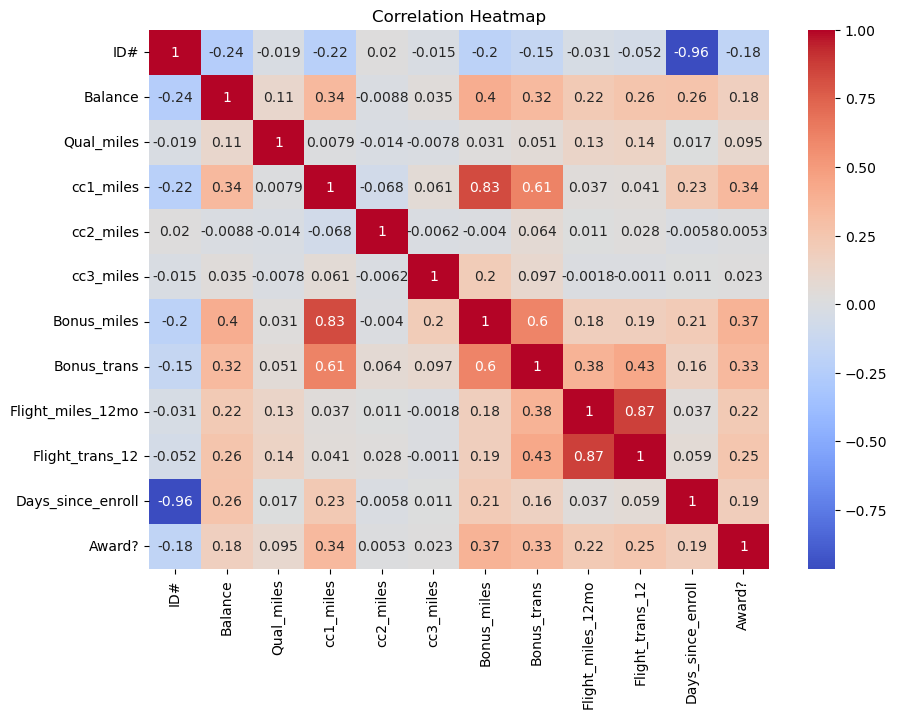

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Implementing Clustering Algorithms

### K-Means

In [8]:
# Elbow method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

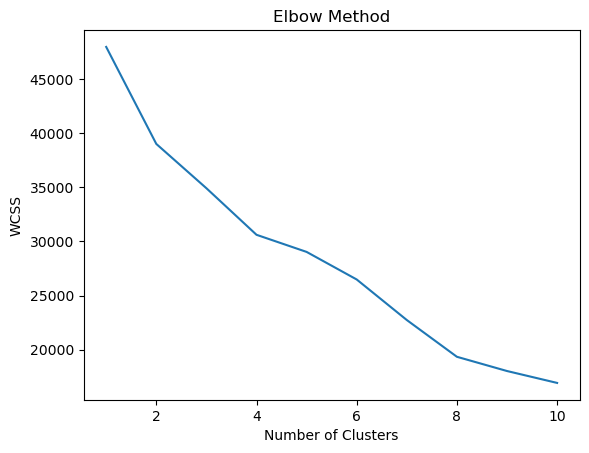

In [9]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
# K-Means with optimal K
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [11]:
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_labels

array([2, 2, 2, ..., 0, 0, 0])

### Hierarchical Clustering

In [12]:
linkage_matrix = linkage(scaled_data, method='ward')
linkage_matrix

array([[2.67800000e+03, 2.67900000e+03, 2.42270462e-03, 2.00000000e+00],
       [3.72600000e+03, 3.72800000e+03, 4.69027727e-03, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 6.46302526e-03, 2.00000000e+00],
       ...,
       [7.98000000e+03, 7.99100000e+03, 8.51146270e+01, 1.84300000e+03],
       [7.98300000e+03, 7.99300000e+03, 8.90846505e+01, 2.15600000e+03],
       [7.99400000e+03, 7.99500000e+03, 1.18009987e+02, 3.99900000e+03]])

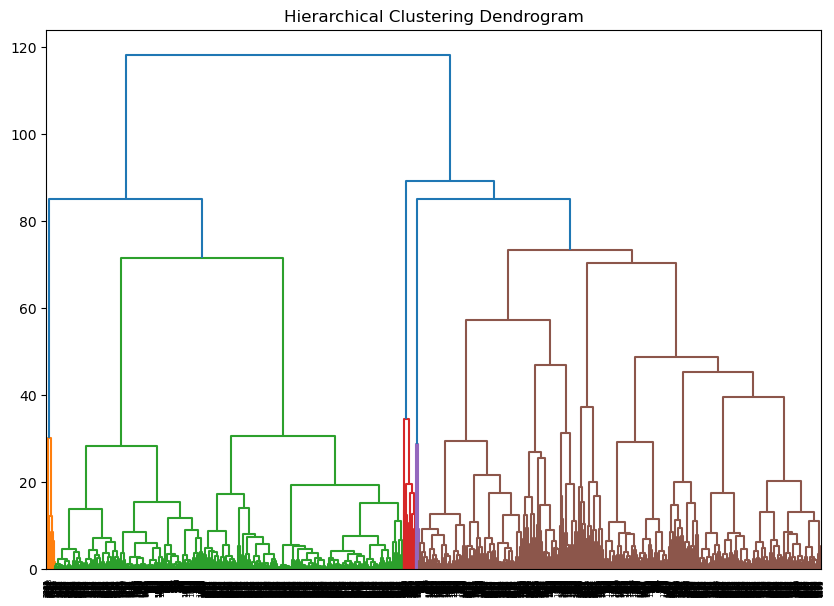

In [13]:
# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

### DBSCAN

In [14]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan

DBSCAN(eps=1.5)

In [15]:
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Cluster Analysis and Interpretation

In [16]:
# Analyzing cluster characteristics
kmeans_cluster = pd.concat([data.reset_index(drop=True), pd.Series(kmeans_labels, name='Cluster')], axis=1)
kmeans_cluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [17]:
# Mean values for each cluster
print(kmeans_cluster.groupby('Cluster').mean())

                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        3111.388308   40980.913231  105.005538   1.444308   1.016615   
1        1533.872934  150218.949380  297.365702   3.833678   1.007231   
2        1078.568990   58553.187767   83.805121   1.549075   1.017070   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         1.001846   6917.616000     8.138462         237.179692   
1         1.046488  48249.512397    21.637397        1197.568182   
2         1.000711   7550.203414     8.695590         209.886202   

         Flight_trans_12  Days_since_enroll    Award?  
Cluster                                                
0               0.691077        2196.562462  0.225231  
1               3.589876        4983.925620  0.750000  
2               0.636558        5744.142959  0.276671  


# Visualization

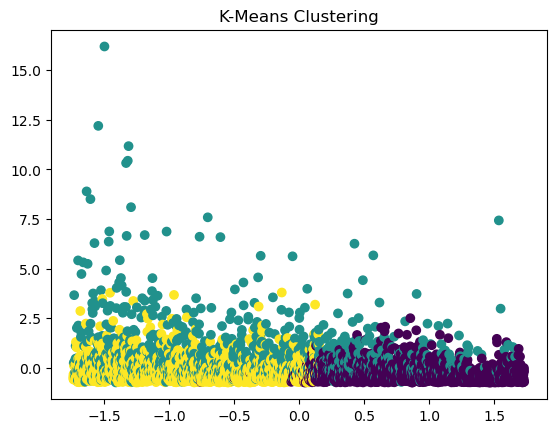

In [18]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

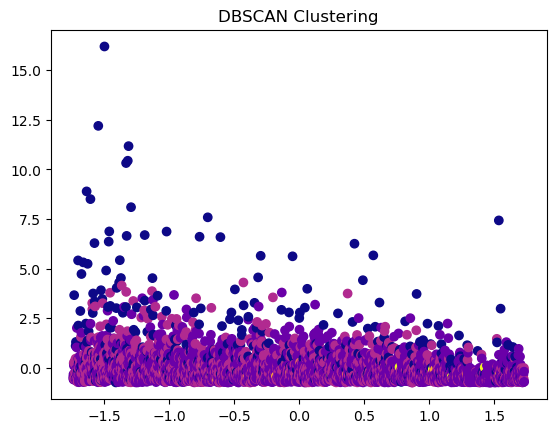

In [19]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

# Evaluation and Performance Metrics

In [20]:
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)

In [21]:
# Silhouette Score for DBSCAN (ignoring noise points)
core_samples_mask = dbscan_labels != -1
silhouette_dbscan = silhouette_score(scaled_data[core_samples_mask], dbscan_labels[core_samples_mask])

In [22]:
print("Silhouette Score for K-Means:", silhouette_kmeans)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)

Silhouette Score for K-Means: 0.201891717665419
Silhouette Score for DBSCAN: 0.2382502956643838
